<a href="https://colab.research.google.com/github/saiyanamadala/Carbon-Footprint-Cohorts/blob/main/Carbon_Footprint_Cohorts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Reading data
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Data Science practice/countries_co2_data.csv')

In [3]:
data.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.isna().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

In light of the integrity and accuracy of official emissions data by country, it is imperative to handle missing values transparently and responsibly, avoiding imputation or replacement methods that may introduce biases or inaccuracies into our analysis.

In [5]:
clean_data=data.dropna()
clean_data=clean_data[clean_data['Country']!='Global']

In [6]:
clean_data.isna().sum()

Country               0
ISO 3166-1 alpha-3    0
Year                  0
Total                 0
Coal                  0
Oil                   0
Gas                   0
Cement                0
Flaring               0
Other                 0
Per Capita            0
dtype: int64

In [7]:
clean_data.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
3232,Australia,AUS,1990,278.154156,141.879819,88.842090,34.454816,3.462872,7.272496,2.242063,16.315938
3233,Australia,AUS,1991,279.528510,146.082840,88.245572,32.786243,3.183033,7.001201,2.229622,16.184767
3234,Australia,AUS,1992,284.525345,150.051381,87.916828,33.970472,2.923411,7.303701,2.359551,16.293502
3235,Australia,AUS,1993,288.870537,150.098575,90.386578,35.670002,3.004698,7.136743,2.573941,16.383765
3236,Australia,AUS,1994,293.696553,151.376241,91.924087,37.032005,3.484276,6.880148,2.999795,16.494706


In [8]:
clean_data.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

In [9]:
clean_data['Country'].nunique()

46

There is data of emissions by 46 countries

In [10]:
clean_data.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000
mean,2001.706994,611.666983,282.541211,198.848283,103.730886,16.386107,4.058290,6.102206,9.010948
std,17.502598,1401.153674,821.894276,448.185591,245.213659,74.855459,10.059772,18.361129,4.709081
min,1904.000000,0.141996,0.000000,0.093291,0.000011,0.000000,0.000000,0.000000,0.604760
25%,1996.000000,38.020610,6.237229,15.573218,5.384227,0.669832,0.006611,0.505471,5.916835
50%,2004.000000,104.398871,31.781796,36.545939,17.974629,2.206055,0.253596,1.201000,8.085689
75%,2013.000000,422.514851,156.249725,181.418668,78.004423,9.407296,2.632045,4.181980,11.169912
max,2021.000000,11472.369171,7955.985419,2644.236598,1673.999100,858.232613,88.383147,177.256846,32.202855


**EDA**

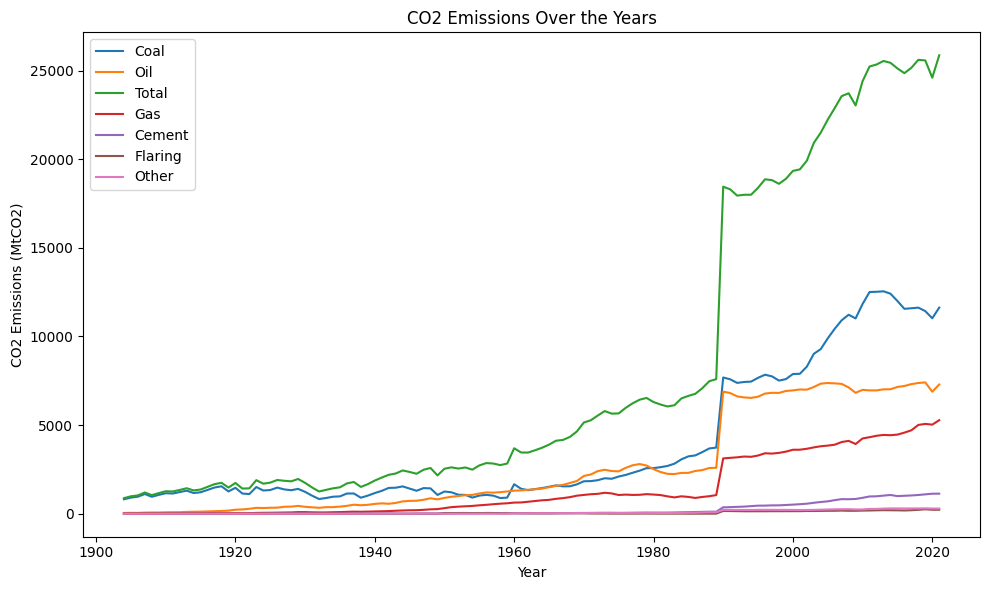

In [11]:
import matplotlib.pyplot as plt
grouped_data=clean_data.groupby('Year')[['Total','Coal', 'Oil','Gas','Cement','Flaring','Other']].sum()
plt.figure(figsize=(10,6))
plt.plot(grouped_data.index,grouped_data['Coal'],label='Coal')
plt.plot(grouped_data.index,grouped_data['Oil'],label='Oil')
plt.plot(grouped_data.index,grouped_data['Total'],label='Total')
plt.plot(grouped_data.index,grouped_data['Gas'],label='Gas')
plt.plot(grouped_data.index,grouped_data['Cement'],label='Cement')
plt.plot(grouped_data.index,grouped_data['Flaring'],label='Flaring')
plt.plot(grouped_data.index,grouped_data['Other'],label='Other')
plt.title('CO2 Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MtCO2)')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
grouped_data.head()

,Total,Coal,Oil,Gas,Cement,Flaring,Other
Year,,,,,,,
1904,882.057539,818.270386,46.789085,15.161569,0.002749,0.0,1.83375
1905,986.482442,913.479168,53.853472,17.165840,0.003512,0.0,1.98045
1906,1035.471247,964.049696,50.273744,19.016160,0.004497,0.0,2.12715
1907,1203.861422,1115.248584,66.688261,19.866147,0.004630,0.0,2.05380
1908,1052.812895,959.762816,71.546928,19.664688,0.004713,0.0,1.83375


Each year, the overall emissions are on the rise. It's noticeable that CO2 emissions from coal, oil, and gas are experiencing significant growth compared to other sources from 1990s, while emissions from cement, flaring, and other sources remain relatively stable throughout the years.

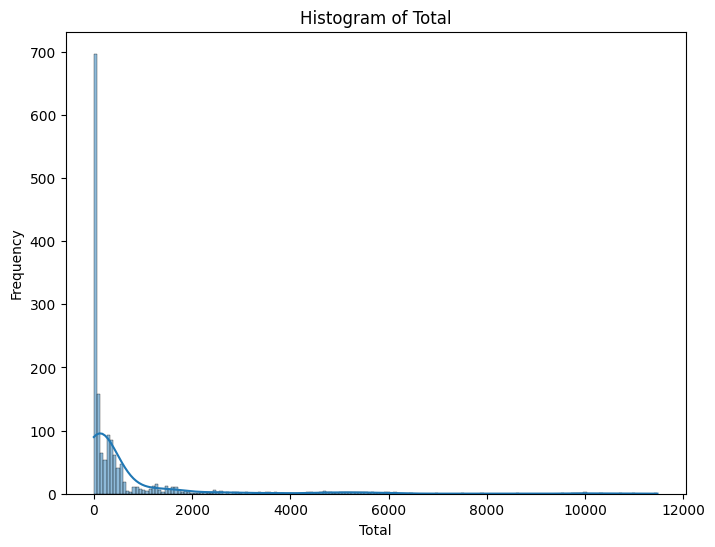

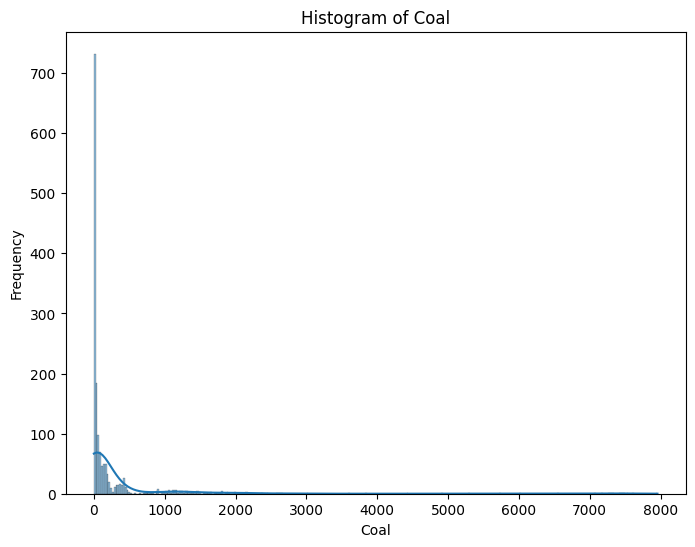

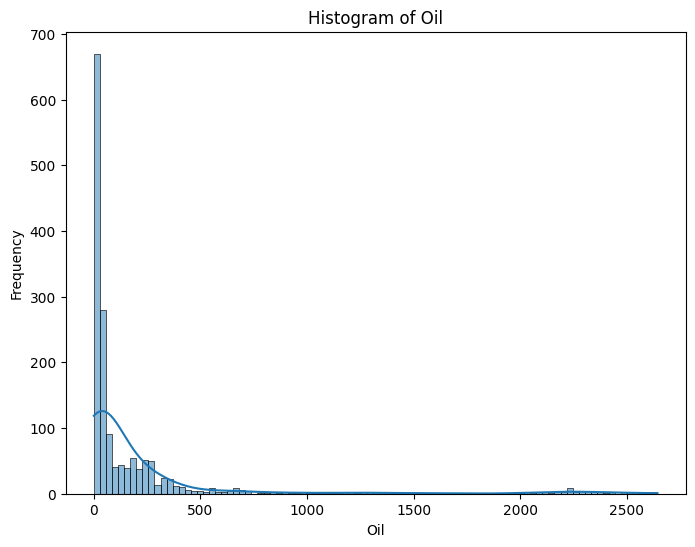

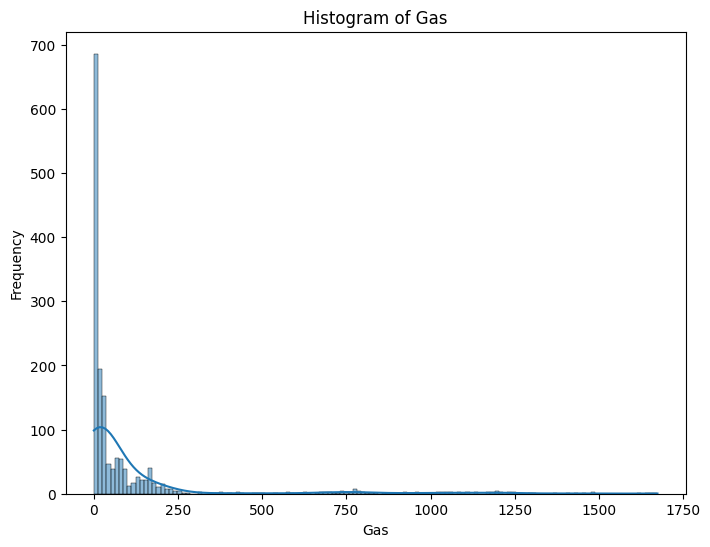

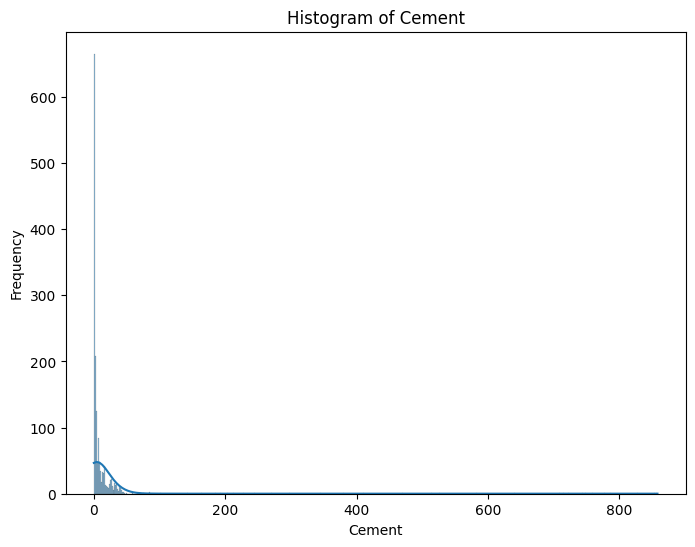

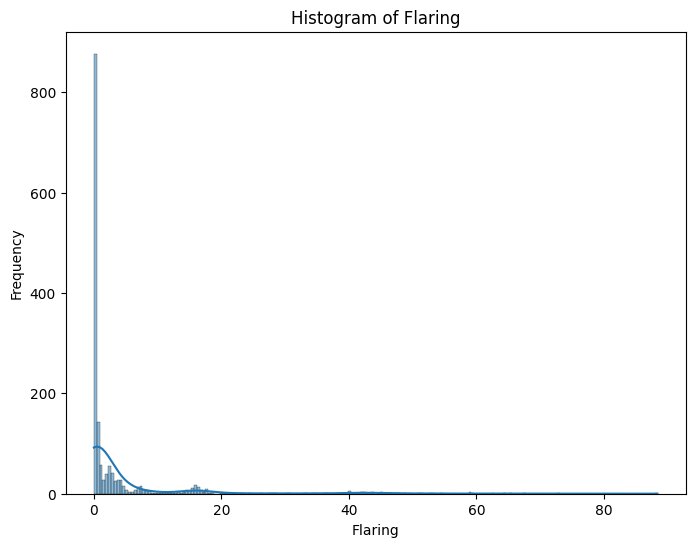

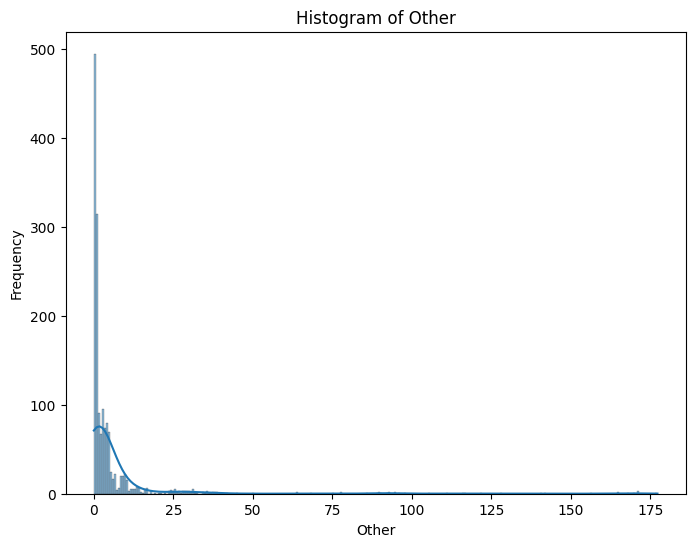

In [13]:
import seaborn as sns
cols=['Total','Coal', 'Oil','Gas','Cement','Flaring','Other']
for column in cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(clean_data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

It can be obsereved that the data is right-skewed

In [14]:
percapita_country=clean_data.groupby('Country')[['Per Capita']].sum()

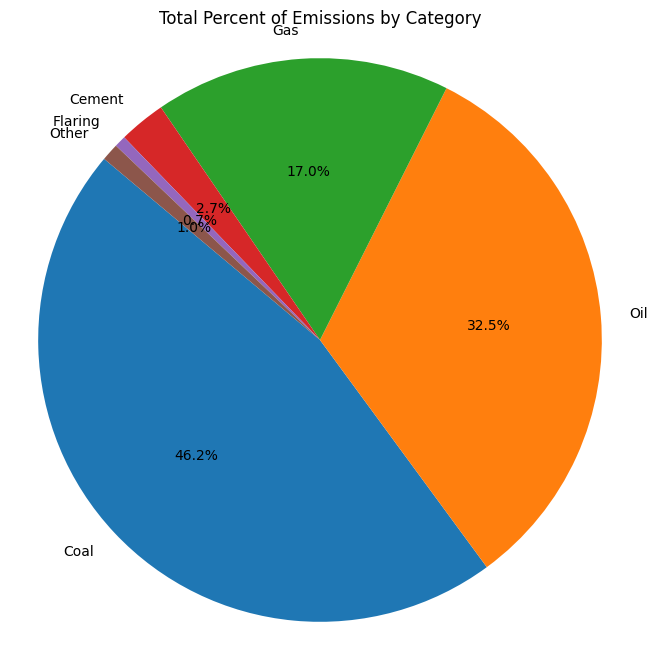

In [15]:
total_emissions=clean_data[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']].sum()
categories = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']
emission_totals=[total_emissions[category] for category in categories]
plt.figure(figsize=(8, 8))
plt.pie(emission_totals,labels=categories,autopct='%1.1f%%',startangle=140)
plt.title('Total Percent of Emissions by Category')
plt.axis('equal')
plt.show()


Coal and oil together contributed to 80% of CO2 emission world wide

In [16]:
percapita_country.head()

,Per Capita
Country,
Australia,560.946135
Austria,263.942037
Belarus,206.393900
Belgium,348.425187
Brazil,64.924090


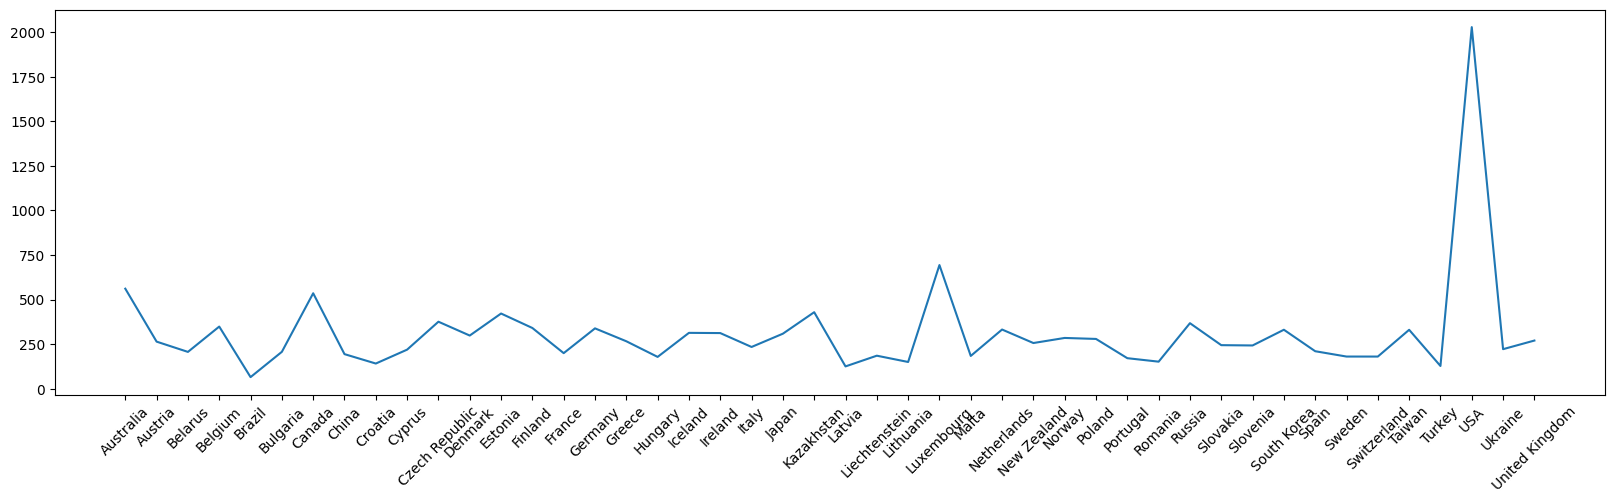

In [17]:
plt.figure(figsize=(20,5))
plt.plot(percapita_country.index,percapita_country['Per Capita'],label='Per Capita')
plt.xticks(rotation=45)
plt.show()

USA has high per capita emission over all the years and Brazil has low per capita emission

In [18]:
usa_percapita=clean_data[clean_data['Country']=='USA']

In [19]:
usa_percapita.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
59994,USA,USA,1904,882.057539,818.270386,46.789085,15.161569,0.002749,0.0,1.83375,10.693551
59995,USA,USA,1905,986.482442,913.479168,53.853472,17.165840,0.003512,0.0,1.98045,11.723323
59996,USA,USA,1906,1035.471247,964.049696,50.273744,19.016160,0.004497,0.0,2.12715,12.072651
59997,USA,USA,1907,1203.861422,1115.248584,66.688261,19.866147,0.004630,0.0,2.05380,13.783778
59998,USA,USA,1908,1052.812895,959.762816,71.546928,19.664688,0.004713,0.0,1.83375,11.822053


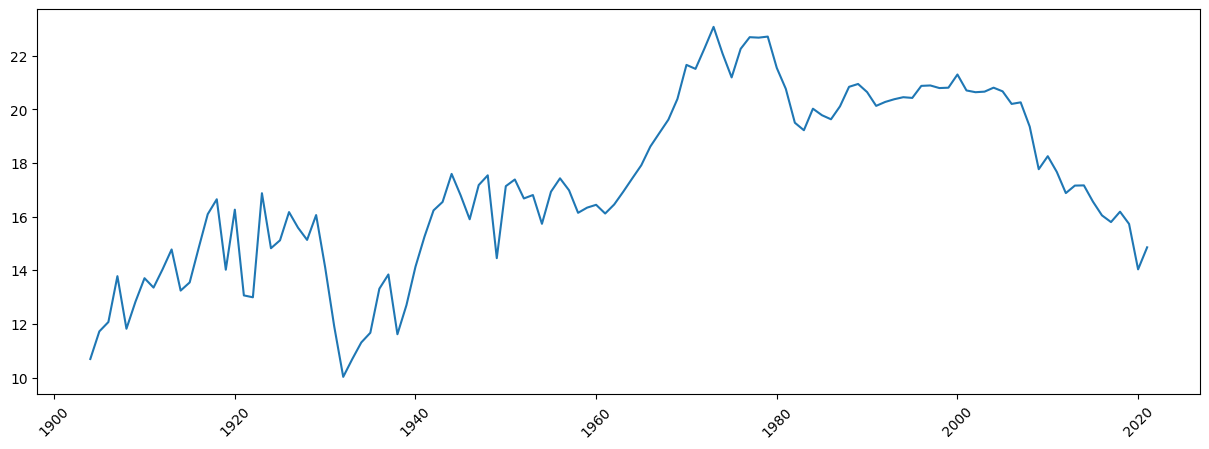

In [20]:
plt.figure(figsize=(15,5))
plt.plot(usa_percapita['Year'],usa_percapita['Per Capita'],label='Per Capita')
plt.xticks(rotation=45)
plt.show()

The decrease in per capita emissions from their peak in 1980 to 2020 suggests that the USA may have implemented measures to mitigate CO2 emissions.

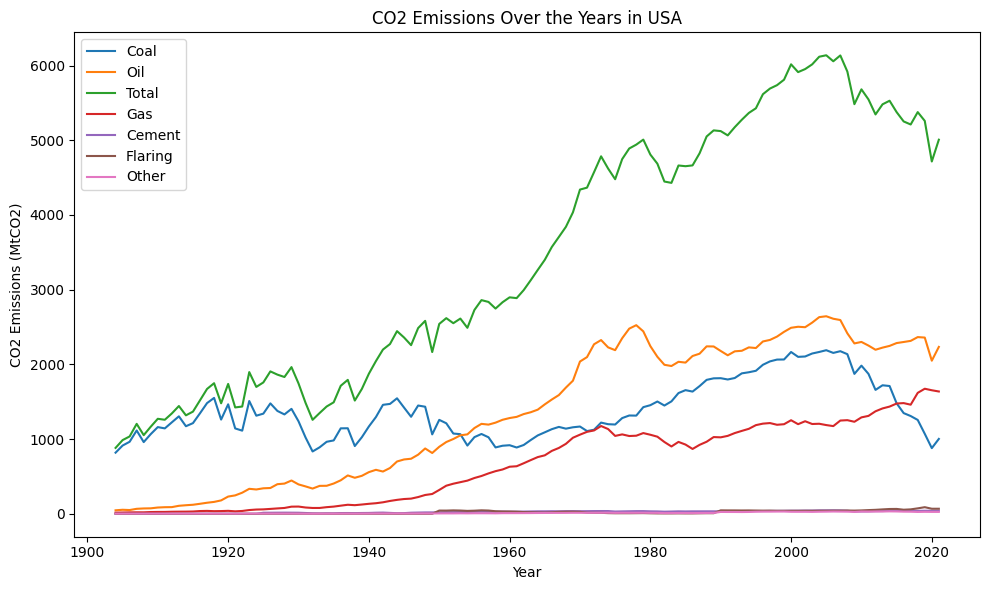

In [21]:
grouped_data=clean_data[clean_data['Country'] == 'USA'][['Total','Coal', 'Oil','Gas','Cement','Flaring','Other','Year']]
plt.figure(figsize=(10,6))
plt.plot(grouped_data['Year'],grouped_data['Coal'],label='Coal')
plt.plot(grouped_data['Year'],grouped_data['Oil'],label='Oil')
plt.plot(grouped_data['Year'],grouped_data['Total'],label='Total')
plt.plot(grouped_data['Year'],grouped_data['Gas'],label='Gas')
plt.plot(grouped_data['Year'],grouped_data['Cement'],label='Cement')
plt.plot(grouped_data['Year'],grouped_data['Flaring'],label='Flaring')
plt.plot(grouped_data['Year'],grouped_data['Other'],label='Other')
plt.title('CO2 Emissions Over the Years in USA')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MtCO2)')
plt.legend()
plt.tight_layout()
plt.show()

Clearly there is decrease in the emission from year 2010

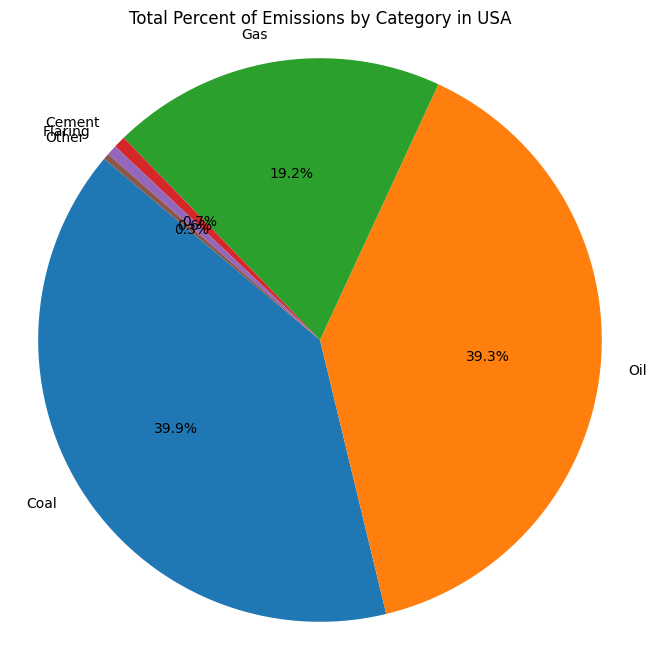

In [22]:
total_emissions=grouped_data.sum()
categories = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']
emission_totals=[total_emissions[category] for category in categories]
plt.figure(figsize=(8, 8))
plt.pie(emission_totals,labels=categories,autopct='%1.1f%%',startangle=140)
plt.title('Total Percent of Emissions by Category in USA')
plt.axis('equal')
plt.show()


coal, oil and gas contribute more to the CO2 emission in USA

**Feature Selection**

<ipython-input-23-e79491c90165>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_data.corr(),annot=True,cmap='coolwarm')


<Axes: >

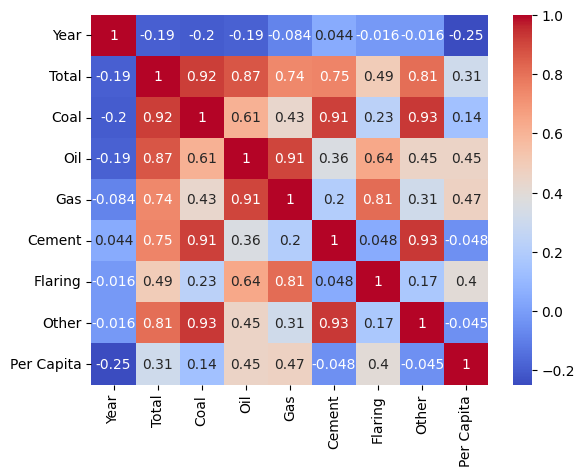

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(clean_data.corr(),annot=True,cmap='coolwarm')

In light of their low correlation with total CO2 emissions, 'Year' and 'Per Capita' features are omitted to enhance clustering precision, focusing solely on more influential variables.

**Clustering**

In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [66]:
x=clean_data[['Coal', 'Oil', 'Gas', 'Cement', 'Other']]

In [67]:
x.head()

,Coal,Oil,Gas,Cement,Other
3232,141.879819,88.842090,34.454816,3.462872,2.242063
3233,146.082840,88.245572,32.786243,3.183033,2.229622
3234,150.051381,87.916828,33.970472,2.923411,2.359551
3235,150.098575,90.386578,35.670002,3.004698,2.573941
3236,151.376241,91.924087,37.032005,3.484276,2.999795


In [68]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

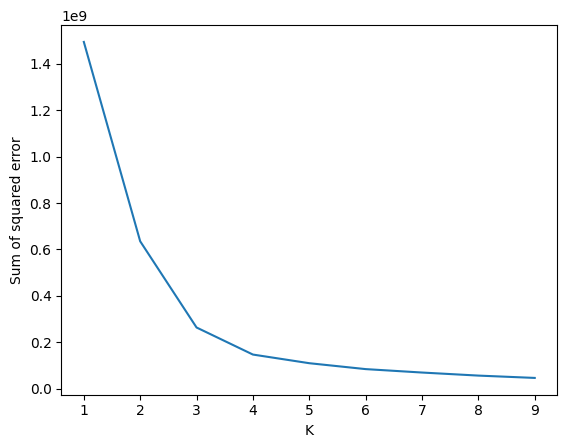

In [69]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

**From the elbow method we can see that the number of clusters can be 3**

In [70]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [71]:
x_scaled

array([[-0.17119687, -0.24552522, -0.28260215, -0.17269694, -0.21030078],
       [-0.16608144, -0.24685661, -0.28940886, -0.17643651, -0.21097857],
       [-0.16125139, -0.24759034, -0.28457796, -0.17990591, -0.20390003],
       ...,
       [ 0.95928538,  4.8209129 ,  6.40569201,  0.32753106,  1.1009571 ],
       [ 0.72590805,  4.13014506,  6.32279429,  0.32474986,  1.04762669],
       [ 0.87600762,  4.54180448,  6.2549162 ,  0.33163714,  1.04762669]])

In [72]:
kmeans=KMeans(n_clusters=3,random_state=34)
kmeans.fit(x_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=34)

In [73]:
clean_data['Cluster']=kmeans.labels_

In [74]:
v=kmeans.labels_
v={'cluster':v}
v=pd.DataFrame(v)
v.value_counts()

cluster
0          1499
2            68
1            20
dtype: int64

In [76]:
def categorize_emissions(cluster_label):
    if cluster_label==0:
        return 'Low Emission'
    elif cluster_label==1:
        return 'Medium Emission'
    elif cluster_label==2:
        return 'High Emission'

In [77]:
clean_data['emission_category']=clean_data['Cluster'].apply(categorize_emissions)

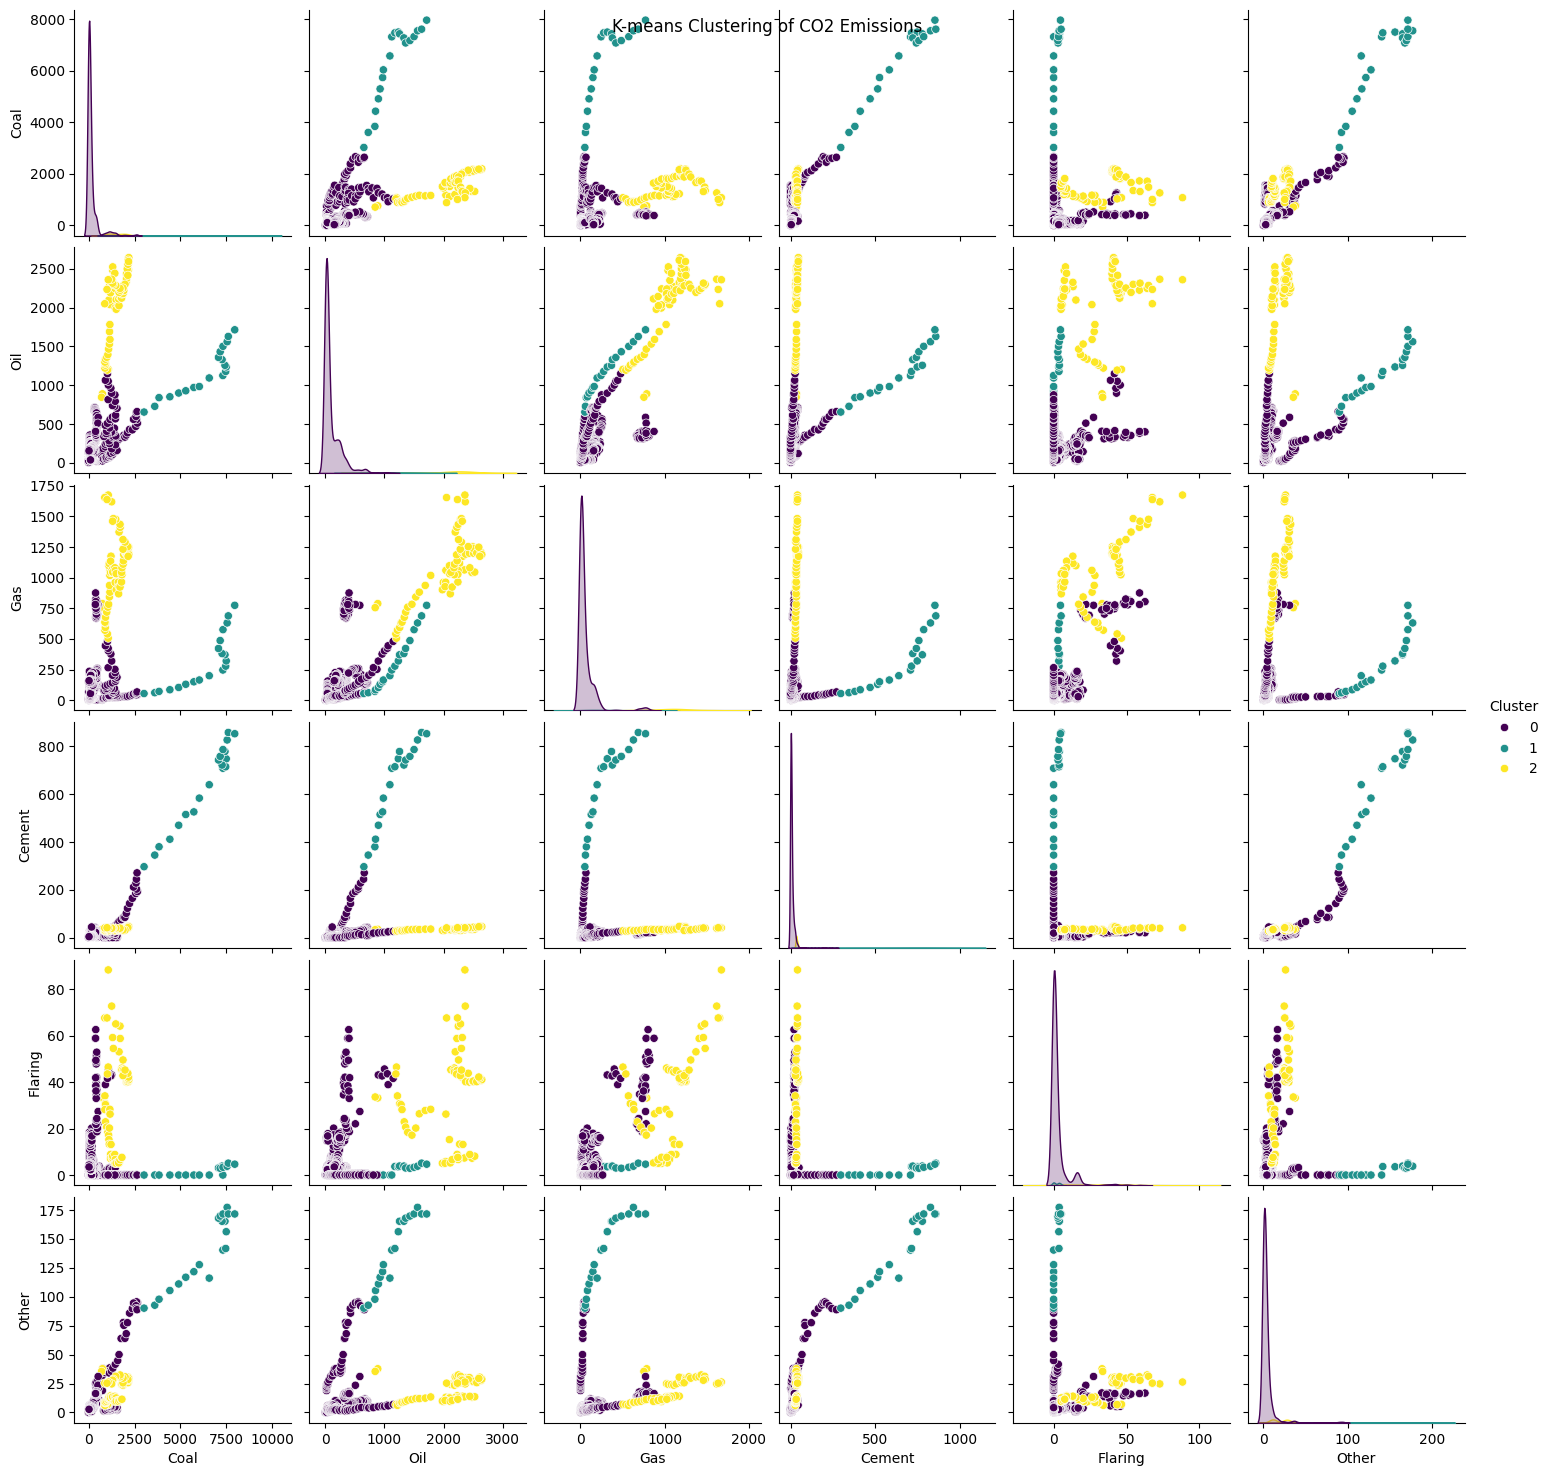

In [78]:
import seaborn as sns

# Visualize clusters using pair plot
sns.pairplot(data=clean_data, vars=['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other'], hue='Cluster', palette='viridis')
plt.suptitle('K-means Clustering of CO2 Emissions')
plt.show()


The clusters are well separated

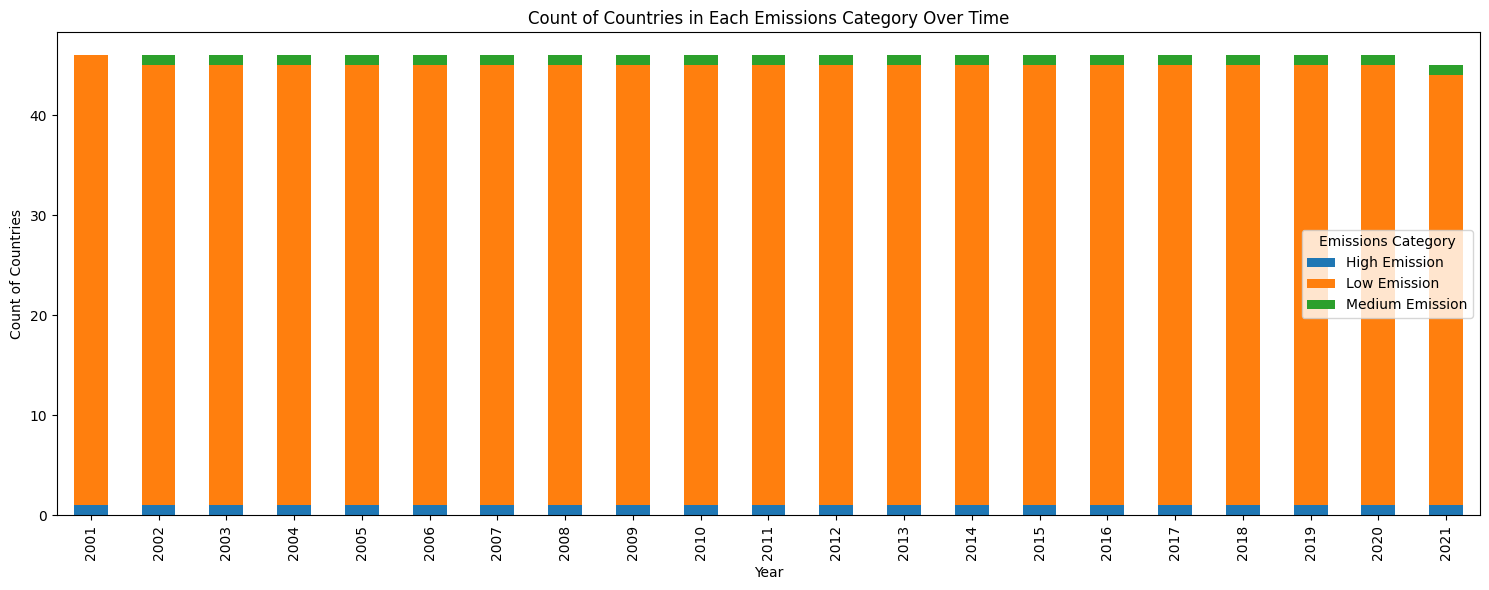

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
clean_data_2020=clean_data[clean_data['Year']>2000]
grouped_data=clean_data_2020.groupby(['Year', 'emission_category']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(15, 6))

plt.title('Count of Countries in Each Emissions Category Over Time')
plt.xlabel('Year')
plt.ylabel('Count of Countries')
plt.legend(title='Emissions Category')
plt.tight_layout()
plt.show()


Above bar plot shows the low, medium and high emission countries count over the years from 2001 to 2021

In [80]:
low_emission=clean_data[clean_data['Cluster']==0]

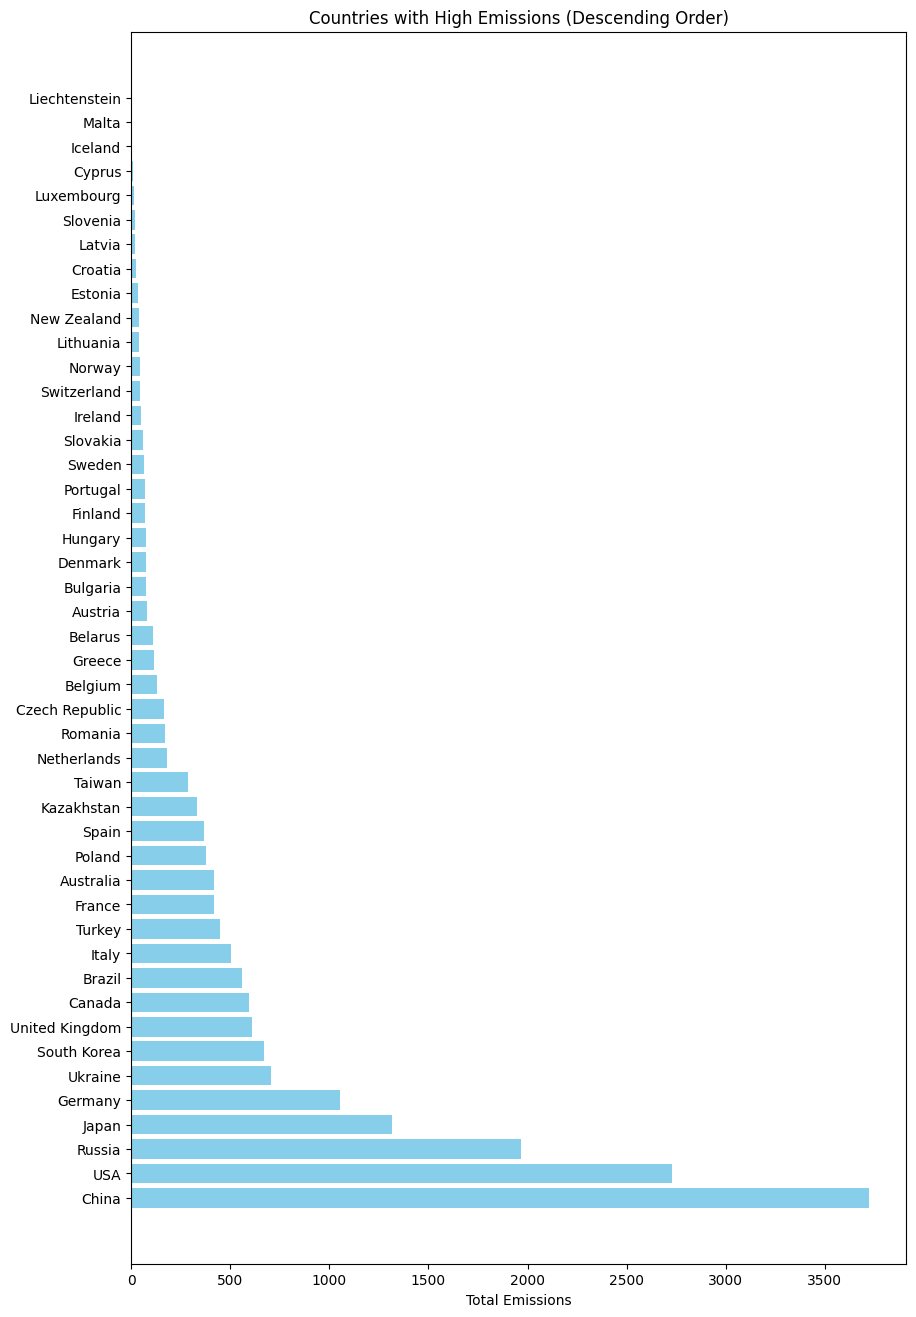

In [81]:
countries = low_emission['Country']
total_emissions = low_emission['Total']
sorted_indices = total_emissions.argsort()[::-1]
sorted_countries = countries.iloc[sorted_indices]
sorted_total_emissions = total_emissions.iloc[sorted_indices]
plt.figure(figsize=(10, 16))
plt.barh(sorted_countries, sorted_total_emissions, color='skyblue')
plt.xlabel('Total Emissions')
plt.title('Countries with High Emissions (Descending Order)')
plt.show()


These are the countries that are emitting less amount of CO2

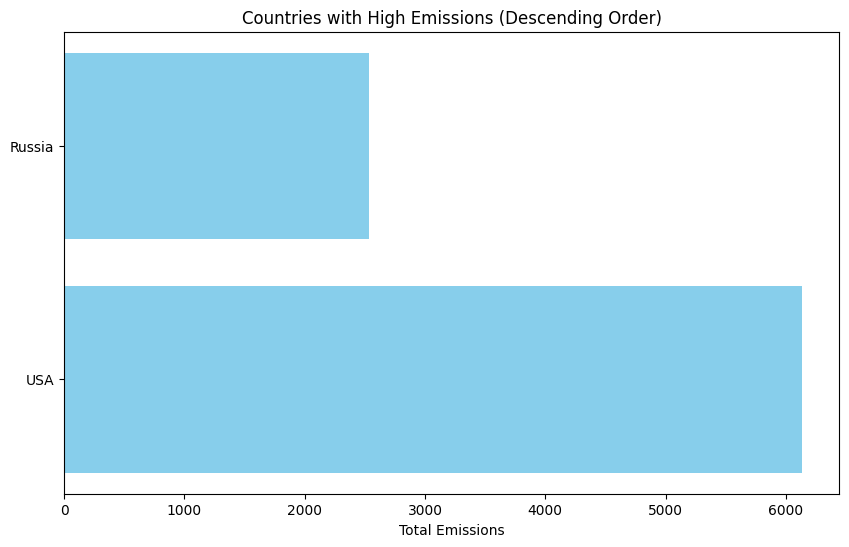

In [82]:
high_emission=clean_data[clean_data['Cluster']==2]
countries =high_emission['Country']
total_emissions =high_emission['Total']
sorted_indices = total_emissions.argsort()[::-1]
sorted_countries = countries.iloc[sorted_indices]
sorted_total_emissions = total_emissions.iloc[sorted_indices]
plt.figure(figsize=(10, 6))
plt.barh(sorted_countries, sorted_total_emissions, color='skyblue')
plt.xlabel('Total Emissions')
plt.title('Countries with High Emissions (Descending Order)')
plt.show()


It is observed that Russia and USA are emitting high amount of CO2

Following is the code that generates the graph based on the input of year and emission category

In [86]:
emission=clean_data[(clean_data['Cluster']==int(input('select category:\n0- Low emission\n1- Medium emission\n2- High emission\n'))) & (clean_data['Year']==2021)]

select category:
0- Low emission
1- Medium emission
2- High emission
0


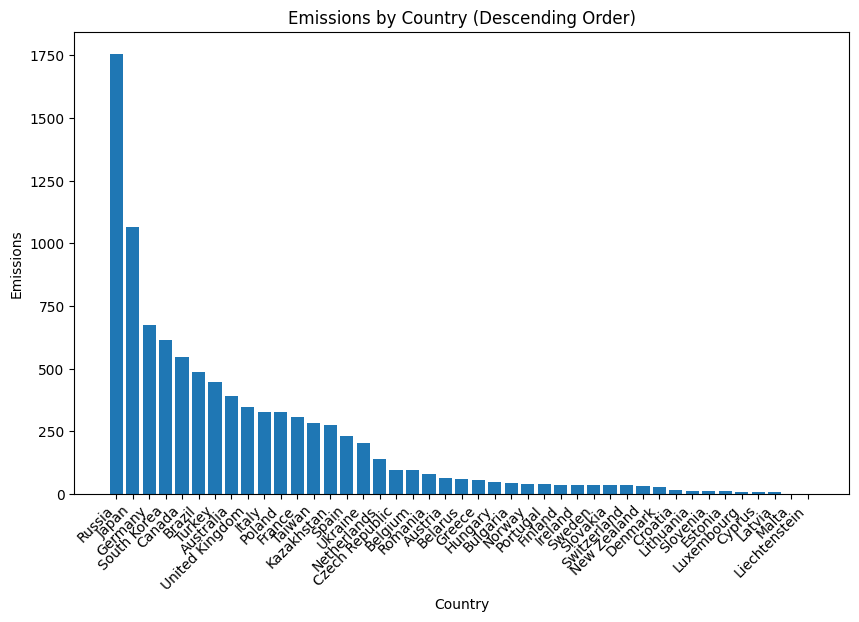

In [87]:
sorted_data=emission.sort_values(by='Total',ascending=False)
plt.figure(figsize=(10,6))
plt.bar(sorted_data['Country'], sorted_data['Total'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Emissions')
plt.title('Emissions by Country (Descending Order)')
plt.show()